In [1]:
# Imports
import time
import random
import numpy as np
import matplotlib.pyplot as plt

import torch

tensor([0.0088], grad_fn=<AddBackward0>)


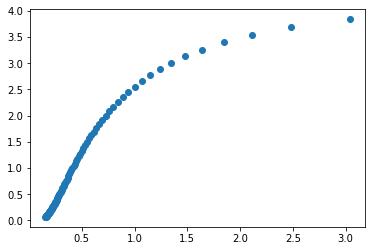

In [2]:
#first working prototype
w1 = torch.autograd.Variable(torch.FloatTensor([4]),requires_grad = True)
w2 = torch.autograd.Variable(torch.FloatTensor([4]),requires_grad = True)
w1_array = np.zeros(100)
w2_array = np.zeros(100)
for i in range(100):
    w1.requires_grad_(True)
    w2.requires_grad_(True)
    external_grad = torch.tensor([1.])
    L = w1**3+w2**2
    L.backward(external_grad)
    with torch.no_grad():
        w1 = w1 - w1.grad*0.02
        w2 = w2 - w2.grad*0.02
    w1_array[i] = torch.Tensor.numpy(w1)
    w2_array[i] = torch.Tensor.numpy(w2)

plt.scatter(w1_array,w2_array)
print(L)

In [3]:
#autoencoder

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [5]:
A = unpickle('data_batch_2')

In [6]:
image_set = list(A.items())[2][1]

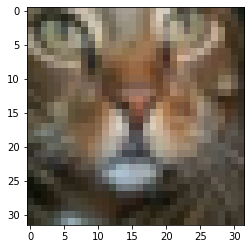

In [7]:
im2 = np.zeros((32,32,3))
R = image_set[5,:1024].reshape(32,32)
G = image_set[5,1024:2048].reshape(32,32)
B = image_set[5,2048:].reshape(32,32)
for i in range(32):
    for j in range (32):
        im2[i,j] = np.array([R[i,j],G[i,j],B[i,j]])
im2 = im2.astype('int')
plt.imshow(im2)

In [8]:
image_set_grayscale = 0.2126*image_set.reshape(10000,3,1024)[:,0,:] + 0.7152*image_set.reshape(10000,3,1024)[:,1,:] + 0.0722*image_set.reshape(10000,3,1024)[:,2,:]
image_set_grayscale = (image_set_grayscale.T).astype('float32')
image_set_grayscale = torch.tensor(image_set_grayscale)/256

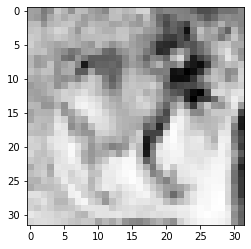

In [9]:
plt.imshow(image_set_grayscale[:,2].reshape(32,32),cmap='Greys')

In [10]:
#autoencoder example 1:
w1 = torch.autograd.Variable(torch.torch.randn((25,1024))/1024,requires_grad = True)
w2 = torch.autograd.Variable(torch.torch.randn((1024,25))/1024,requires_grad = True)
b = torch.autograd.Variable(torch.torch.randn(1,25),requires_grad = True)
loss_list = np.zeros(1000)
m = torch.nn.ReLU()

for i in range(1000):
    w1.requires_grad_(True)
    w2.requires_grad_(True)
    b.requires_grad_(True)
    a = m(torch.matmul(w1,image_set_grayscale)+b.T)
    y = torch.matmul(w2,a)
    L = torch.sum(torch.sum((image_set_grayscale - y)**2))/10000
    L.backward()
    with torch.no_grad():
        w1 = w1 - w1.grad*0.002
        w2 = w2 - w2.grad*0.002
        b = b - b.grad*0.002
    loss_list[i] = L

tensor(25.9639, grad_fn=<DivBackward0>)


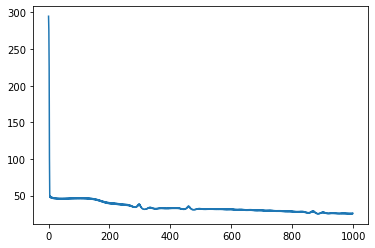

In [11]:
plt.plot(loss_list)
print(L)

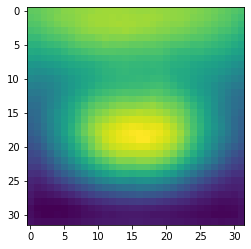

In [12]:
w1 = w1.detach()
w2 = w2.detach()
b = b.detach()
a = m(torch.matmul(w1,image_set_grayscale)+b.T)
y = torch.matmul(w2,a)
plt.imshow(y[:,5].detach().numpy().reshape(32,32))

In [13]:
torch.argsort(torch.sum(w2**2,axis = 0))

tensor([ 2, 15, 14,  6,  4, 13, 22, 21, 20, 10, 11, 12,  1,  5, 18,  3, 16,  9,
         8, 23,  7, 17,  0, 19, 24])

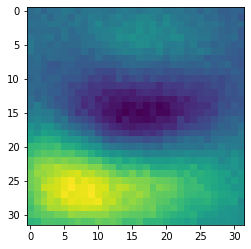

In [14]:
plt.imshow(w2[:,10].numpy().reshape(32,32))

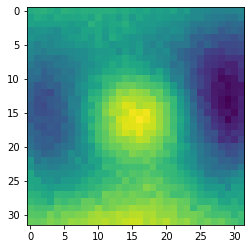

In [24]:
plt.imshow(w2[:,11].numpy().reshape(32,32))

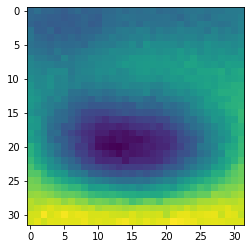

In [25]:
plt.imshow(w2[:,1].numpy().reshape(32,32))

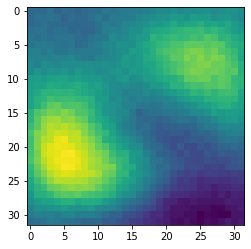

In [26]:
plt.imshow(w2[:,5].numpy().reshape(32,32))

In [18]:
#whitening and pre-processing
image_set_zero_mean = (image_set_grayscale.T - torch.mean(image_set_grayscale,axis=1)).T

In [19]:
L,V = torch.linalg.eig(torch.cov(image_set_zero_mean))
W = torch.matmul(torch.diag(L**-0.5),V.T)

In [20]:
image_set_white = torch.matmul(torch.real(W),image_set_zero_mean)
torch.cov(image_set_white)

tensor([[ 1.0000e+00, -1.6710e-07,  1.3710e-07,  ...,  1.6428e-06,
         -7.9611e-06,  1.5616e-06],
        [-1.6710e-07,  1.0000e+00, -3.3382e-08,  ..., -3.2424e-06,
         -4.1578e-06,  3.1298e-07],
        [ 1.3710e-07, -3.3382e-08,  1.0000e+00,  ...,  7.6523e-07,
          1.0158e-06,  1.0287e-06],
        ...,
        [ 1.6428e-06, -3.2424e-06,  7.6523e-07,  ...,  1.0003e+00,
          2.7179e-03,  3.1281e-02],
        [-7.9611e-06, -4.1578e-06,  1.0158e-06,  ...,  2.7179e-03,
          9.9996e-01, -1.3574e-02],
        [ 1.5616e-06,  3.1298e-07,  1.0287e-06,  ...,  3.1281e-02,
         -1.3574e-02,  9.9979e-01]])